# Tasks notebook
***

## Task 1 - Square roots (Newton's method)

Square roots are difficult to calculate. In Python, you typically
use the power operator (a double asterisk) or a package such
as math. In this task, you should write a function sqrt(x) to approximate the square root of a floating point number $x$ without
using the power operator or a package.

Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i+1}$ is less than some threshold, say $0.01$.

Newton's formula from https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf (page 1).

In [1]:
def sqrt (x):
    n = x 
    while (float(x > 0)) :
        
        #Newton's formula    
        root = 0.5 * (n + (x / n))

        #calculate until the difference 
        #between the root and n is less than 0.01
        if abs(root - n) < 0.01:
            break 
        
        #Returns the last calculated number for n
        n = root
    
    return root

In [2]:
#test
sqrt(4)

2.0000000929222947

## Task 2 - Chi-squared test

Consider the below contingency table based on a survey asking
respondents whether they prefer coffee or tea and whether they
prefer plain or chocolate biscuits. Use scipy.stats to perform
a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this
instance.

|  |  | *Biscuit*   | |
| :-----------: | :-----------: | :-----------: | :---------:|
|  |  | **Chocolate**|**Plain**|
| *Drink*     | **Coffee**  | 43           |57       |
|  | **Tea**     | 56           |45       |


In [38]:
#import modules
import numpy as np
import scipy.stats as ss

**Null hypotesis:** There is evidence of an association between drink preference and biscuit preference.

In [11]:
#create array
table = np.array([[43, 57], [56, 45]])

#do the statistics
result = ss.chi2_contingency(table, correction=False)

#show pvalue
result.pvalue

0.07762509678333357

With a significance level of 5%, an observed pvalue of ~7.8% would suggest that we accept the null hypotesis that there is evidence of association between drink and biscuit preferences.

## Task 3 - t-test
Perform a t-test on the famous [penguins data set](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv) to investigate whether there is evidence of a significant difference in the body
mass of male and female gentoo penguins.

In [1]:
#import modules
import pandas as pd

In [3]:
#read dataset
df=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
df.head

<bound method NDFrame.head of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1  

In [4]:
#selecting columns
df=df[['species','body_mass_g','sex']]
df.head

<bound method NDFrame.head of     species  body_mass_g     sex
0    Adelie       3750.0    MALE
1    Adelie       3800.0  FEMALE
2    Adelie       3250.0  FEMALE
3    Adelie          NaN     NaN
4    Adelie       3450.0  FEMALE
..      ...          ...     ...
339  Gentoo          NaN     NaN
340  Gentoo       4850.0  FEMALE
341  Gentoo       5750.0    MALE
342  Gentoo       5200.0  FEMALE
343  Gentoo       5400.0    MALE

[344 rows x 3 columns]>

In [7]:
#filtering only gentoo
gentoo = df.loc[df['species']=='Gentoo']
gentoo

,species,body_mass_g,sex
220,Gentoo,4500.0,FEMALE
221,Gentoo,5700.0,MALE
222,Gentoo,4450.0,FEMALE
223,Gentoo,5700.0,MALE
224,Gentoo,5400.0,MALE
...,...,...,...
339,Gentoo,NaN,NaN
340,Gentoo,4850.0,FEMALE
341,Gentoo,5750.0,MALE
342,Gentoo,5200.0,FEMALE


In [15]:
#male body mass
sample_a = gentoo[gentoo['sex'] == 'MALE']['body_mass_g'].to_numpy()

sample_a

array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
       5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
       5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
       5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
       5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
       5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
       5500., 5950., 5500., 5850., 6000., 5750., 5400.])

In [16]:
#female body mass
sample_b = gentoo[gentoo['sex'] == 'FEMALE']['body_mass_g'].to_numpy()

sample_b

array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
       4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
       4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
       4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
       4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
       4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
       4375., 4925., 4850., 5200.])

In [17]:
# t-test
ss.ttest_ind(sample_a, sample_b)

Ttest_indResult(statistic=14.721676481405709, pvalue=2.133687602018886e-28)

T-test result provides evidence that there is a significant difference in body mass of male and female Gentoo penguins. The low pvalue indicates that the mean values of body mass for males and females are highly unlikely to coincide, which invalidates the null hypotesis that males and females are indistinguishable by body mass. 

# Task 4 - K-Nearest Neighbours (KNN)

Using the famous [iris data set](https://archive.ics.uci.edu/dataset/53/iris), suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.


In [13]:
# Data frames
import pandas as pd

# Machine learning
import sklearn as sk

# Classifier
from sklearn.ensemble import RandomForestClassifier

#Repository package
from ucimlrepo import fetch_ucirepo 


In [ ]:
# Create a new instance of a classifier
clf = sk.neighbors.KNeighborsClassifier()

In [43]:
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
x = iris.data.features
y = iris.data.targets
y = y['class']


In [11]:
# Create array
x.to_numpy()

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [55]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(x, y)

KNeighborsClassifier()

In [50]:

# Keep some samples back for testing, train on the others.
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y)

In [51]:
x_train

,sepal length,sepal width,petal length,petal width
72,6.3,2.5,4.9,1.5
127,6.1,3.0,4.9,1.8
57,4.9,2.4,3.3,1.0
137,6.4,3.1,5.5,1.8
100,6.3,3.3,6.0,2.5
...,...,...,...,...
37,4.9,3.1,1.5,0.1
21,5.1,3.7,1.5,0.4
25,5.0,3.0,1.6,0.2
63,6.1,2.9,4.7,1.4


In [52]:
# Create a new instance of a classifier
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data
clf.fit(x_train, y_train)

KNeighborsClassifier()

In [53]:
# Predict based on test set
clf.predict(x_test)

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [57]:
# Proportion of correct classifications on test set.
(clf.predict(x_test) == y_test).sum() / x.shape[0]

0.24666666666666667

In [54]:
# Create a new instance of a classifier
clf = sk.neighbors.KNeighborsClassifier()

# Run cross-validation with five folds
sk.model_selection.cross_val_score(clf, x, y)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

# Task 5 - PCA
Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose of the analysis and your results.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
from seaborn import scatterplot

iris = fetch_ucirepo(id=53)

# Separate features from target variable
X = iris.data.features
y = iris.data.targets

In [26]:
# Perform PCA to reduce the number of dimensions to two
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [27]:
# Create a pandas dataframe
df = pd.DataFrame(X_new, columns=['PC1', 'PC2'])
df['Species'] = y
df['Species'] = df['Species'].astype(str)


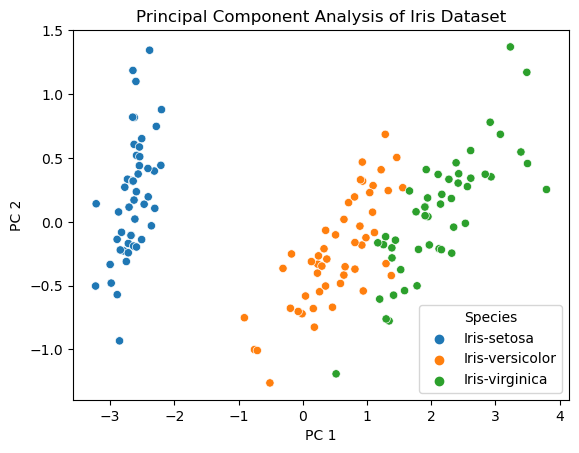

In [28]:
# Use Seaborn to plot the Iris flowers
scatterplot(x='PC1', y='PC2', hue='Species', data=df)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Principal Component Analysis of Iris Dataset')
plt.show()

In the case of the Iris dataset, PCA can be used to reduce the four original features (sepal length, sepal width, petal length, and petal width) to two principal components. These explain the most variance in the data, and they can be used to visualise the data and classify the Iris species.